# Aprendizaje no supervisado
El objetivo del aprendizaje no supervisado es determinar la agrupación de los datos de entrada basado en alguna medida de similitud. Los algoritmos más comunes en el aprendizaje no supervisado son *K-Means* y *GMM*. Aunque ambos determinan los *clusters* o agrupaciones de los datos, difieeren en los parámetros de conformación del cluster

## *K-Means*
El algoritmo *K-Means* utiliza la distacia Euclidea para conformar las agrupaciones de los datos. La idea entonces es generar un *centroide* para cada grupo, de tal forma que la distancia entre los centroides sea máxima mientras la distancia del centroide a los demás elementos del mismo grupo sea mínima.

In [85]:
# importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cross_validation import StratifiedKFold # libreria para particionar con k folds


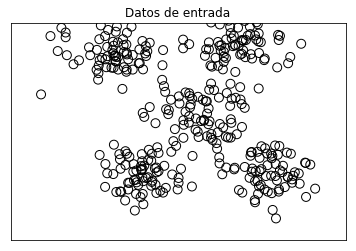

In [86]:
# importamos los datos
X = np.loadtxt('data_clustering.txt', delimiter=",")
# graficamos la informacion de entrada
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', edgecolors='black', s=80, facecolors='None')
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1 # fijamos el rango del eje X
y_min, y_max = X[:,0].min()-1, X[:,0].max()+1 # fijamos el rango del eje y
plt.title('Datos de entrada')
plt.xlim(x_min,x_max) # limites para el eje x
plt.ylim(y_min,y_max) # limites para el eje y
plt.xticks(()) # eliminamos los numeros del eje y
plt.yticks(()) # eliminamos los numeros del eje y
plt.show()

In [87]:
# particionamos los datos
#particion = StratifiedKFold()
vector = np.arange(0,350)
np.random.seed(0)
y = np.random.permutation(350)
X_train = X[y[0:280],:]
X_test = X[y[280:351],:]
print(X_train.shape, X_test.shape)

(280, 2) (70, 2)


In [88]:
# ajustamos los parametros del K-Means
num_clusters = 5
# instanciamos el algoritmo
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10) # n_init es el numero de iteraciones para fijar centroides
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [95]:
# validamos el algoritmo
k_y = kmeans.predict(X_test)
print(y)

[0 4 0 2 1 3 1 1 4 4 2 1 4 4 3 4 3 0 0 0 4 4 0 3 0 0 0 1 2 4 1 4 4 3 3 0 4
 4 3 3 4 2 2 0 3 3 4 3 3 3 2 4 2 0 2 0 3 4 4 4 4 1 2 3 1 0 4 1 4 4]


## GMM
El algoritmo de clustering de Mezclas de Gaussianas, permite agrupar los datos basándose en la premisa de que la función de densidad de probabilidad es Gaussiana, por tanto los conjuntos se puieden modelar como una mezcla de estas funciones de densidad:

$$p_(X)(x) = \frac{1}{\sqrt(2\pi\sigma^2)}\exp(-\frac{(x-m_X)^2}{2\sigma^2})$$

In [90]:
from sklearn.mixture import GMM, GaussianMixture
# instanciamos el algoritmo
gmm = GMM(n_components=num_clusters, covariance_type='full', init_params='wc', n_iter=20)
gmm2 = GaussianMixture(n_components=num_clusters, covariance_type='full', init_params='kmeans', max_iter=20)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [97]:
gmm.fit(X_train)
y = gmm.predict(X_test)
print(k_y)
print(y)

gmm2.fit(X_train)
y2 = gmm2.predict(X_test)
print(y2)

[0 1 0 4 3 2 3 3 1 1 4 3 1 1 2 1 2 0 0 0 0 1 0 2 0 0 0 3 4 1 3 1 1 2 2 0 1
 1 2 2 1 4 1 0 2 2 1 2 2 2 4 1 4 0 4 0 2 1 1 1 1 3 4 2 3 0 1 3 1 1]
[0 4 0 2 1 3 1 1 4 4 2 1 4 4 3 4 3 0 0 0 4 4 0 3 0 0 0 1 2 4 1 4 4 3 3 0 4
 4 3 3 4 2 2 0 3 3 4 3 3 3 2 4 2 0 2 0 3 4 4 4 4 1 2 3 1 0 4 1 4 4]
[1 4 1 2 0 3 0 0 4 4 2 0 4 4 3 4 3 1 1 1 4 4 1 3 1 1 1 0 2 4 0 4 4 3 3 1 4
 4 3 3 4 2 2 1 3 3 4 3 3 3 2 4 2 1 2 1 3 4 4 4 4 0 2 3 0 1 4 0 4 4]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:7